In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Getting the html and parsing

def getAndParse(url):
    r = requests.get(url)
    html_content = r.content
    soup = BeautifulSoup(html_content,'html.parser')
    return soup

In [3]:
#getting links of all pages from start=1 to 50

start_from = list(range(1,1655,50))
PAGES = []


url1 = "https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start="
url2 = "&ref_=adv_nxt"
html = getAndParse("https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=5aab685f-35eb-40f3-95f7-c53f09d542c3&pf_rd_r=BSQ0CNKW0HDSGXPKSMPX&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1")


for page_num in start_from:
    PAGES.append(url1+str(page_num)+url2)

In [4]:
for i in PAGES:
    print(i)
    print()

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&s

In [5]:
MOVIES = []

for page in PAGES[::]:
    html = getAndParse(page)    
    for div in html.findAll("div", {"class": "lister-item-content"}):
        for h3 in div.findAll("h3", {"class": "lister-item-header"}):
            for a in h3.findAll("a"):
                MOVIES.append("https://www.imdb.com"+a["href"])

In [6]:
len(MOVIES)

1655

In [7]:
FEATURES = []
for m in MOVIES[::]:
    movie = getAndParse(m)
    film_name = movie.find ("h1", {"data-testid": "hero-title-block__title"}).text
    imdb_rating = movie.find ('span', {'class':'sc-7ab21ed2-1'}).text
    director = movie.find ("a", {"class":"ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"}).text
    release_date = movie.find ("a", {"class":"ipc-link ipc-link--baseAlt ipc-link--inherit-color sc-8c396aa2-1 WIUyh"}).text
    runtime = movie.find ("li", {"data-testid":"title-techspec_runtime"}).text.replace("Runtime","").replace("hours", "h").replace("minutes","m")
    
    
    for div in movie.findAll("div", {"data-testid":"title-boxoffice-section"}):
        #Budget
        for li in div.findAll("li",{"data-testid":"title-boxoffice-budget"}):
            for span in li.findAll("span",{"class":"ipc-metadata-list-item__list-content-item"}) :
                budget = span.text
        #Gross
        for li2 in div.findAll("li",{"role":"presentation"}):
            for span2 in li2.findAll("span",{"class":"ipc-metadata-list-item__list-content-item"}) :
                gross = span2.text

    all_reviews = []
    for ul in movie.findAll("ul", {"data-testid":"reviewContent-all-reviews"}):
        for span in ul.findAll("span", {"class":"score"}):
            #print (span.text)
            all_reviews.append(span.text)
            
    user_reviews = all_reviews[0]
    critic_reviews = all_reviews[1]
    try:
        metascore = all_reviews[2]
    except IndexError :
        metascore = 0          
    

    FEATURES.append([film_name,imdb_rating,director,release_date,runtime,budget,gross,user_reviews,critic_reviews,metascore])
    
feature_columns= ["FILM", "IMDB RATING", "DIRECTOR", "RELEASE DATE", "RUN TIME","BUDGET","GROSS","USER REVIEWS","CRITIC REVIEWS","METASCORE"]
df1 = pd.DataFrame.from_records(FEATURES, columns=feature_columns)

In [48]:
df2 = df1.copy()
pd.set_option('display.max_rows', None)
df2

FILM IMDB RATING  \
0                                       The Dark Knight         9.0   
1         The Lord of the Rings: The Return of the King         9.0   
2                                             Inception         8.8   
3                 The Lord of the Rings: The Two Towers         8.8   
4     The Lord of the Rings: The Fellowship of the Ring         8.8   
5                                            The Matrix         8.7   
6        Star Wars: Episode V - The Empire Strikes Back         8.7   
7                                          Karthikeya 2         8.6   
8                            Terminator 2: Judgment Day         8.6   
9                                             Star Wars         8.6   
10                                             Harakiri         8.6   
11                                        Seven Samurai         8.6   
12                                               Kaithi         8.5   
13                                               Asuran         8.5   
14                                    Top Gun: Maverick         8.5   
15                                            Gladiator         8.5   
16                               Léon: The Professional         8.5   
17                                               Vikram         8.4   
18                    Spider-Man: Into the Spider-Verse         8.4   
19                                    Avengers: Endgame         8.4   
20                               Avengers: Infinity War         8.4   
21                                The Dark Knight Rises         8.4   
22                                     K.G.F: Chapter 2         8.4   
23                                            Shershaah         8.4   
24                                               Oldboy         8.4   
25                                               Aliens         8.4   
26        Indiana Jones and the Raiders of the Lost Ark         8.4   
27                                               Dangal         8.3   
28                              Spider-Man: No Way Home         8.3   
29                                                 Heat         8.3   
30           Star Wars: Episode VI - Return of the Jedi         8.3   
31                                   North by Northwest         8.3   
32                                                 1917         8.2   
33                             Uri: The Surgical Strike         8.2   
34                                     K.G.F: Chapter 1         8.2   
35                    Everything Everywhere All at Once         8.2   
36                                         Vikram Vedha         8.2   
37                                      The Mountain II         8.2   
38                          Baahubali 2: The Conclusion         8.2   
39                                   Gangs of Wasseypur         8.2   
40                                     Paan Singh Tomar         8.2   
41                                              Warrior         8.2   
42                  Demon Slayer the Movie: Mugen Train         8.2   
43                                       V for Vendetta         8.2   
44                                        Batman Begins         8.2   
45                                    Kill Bill: Vol. 1         8.2   
46                  Lock, Stock and Two Smoking Barrels         8.2   
47                                        Jurassic Park         8.2   
48                   Indiana Jones and the Last Crusade         8.2   
49                                             Die Hard         8.2   
50                                                  Ran         8.2   
51                                              Yojimbo         8.2   
52                                          The General         8.2   
53                                         Sherlock Jr.         8.2   
54                                    Bajrangi Bhaijaan         8.1   
55                                                Logan         8.1   
56  

In [49]:
# Budget 
def convert_budget(budget):
    i = budget
    i = i.split(' ')[0]
    if '$' in i:
        i = i.split('$')[-1].replace(',','')
        return(float(i))
        
    elif '¥' in i:
        i = i.split('¥')[-1].replace(',','')
        i = float(i)*0.0073
        return(i)
        
    elif '₹' in i:
        i = i.split('₹')[-1].replace(',','')
        i = float(i)*0.0125
        return(i)
        
    elif 'FRF' in i:
        i = i.split('FRF')[-1].replace(',','').strip()
        i = float(i)*0.1513  
        return(i)
        
    elif 'TRL' in i:
        i = i.split('TRL')[-1].replace(',','').strip()
        i = float(i)*0.06  
        return(i)
    
    elif '£' in i:
        i = i.split('£')[-1].replace(',','')
        i = float(i)*1.18  
        return(i)
        
    elif 'MVR' in i:
        i = i.split('MVR')[-1].replace(',','').strip()
        i = float(i)*0.06  
        return(i)
        
    elif 'DEM' in i:
        i = i.split('DEM')[-1].replace(',','').strip()
        i = float(i)*0.99  
        return(i)
        
    elif '₩' in i:
        i = i.split('₩')[-1].replace(',','')
        i = float(i)*0.00074  
        return(i)
        
    elif 'PKR' in i:
        i = i.split('PKR')[-1].replace(',','').strip()
        i = float(i)*0.0046  
        return(i)
        
    elif 'NOK' in i:
        i = i.split('NOK')[-1].replace(',','').strip()
        i = float(i)*0.10  
        return(i)
        
    elif 'CN¥' in i:
        i = i.split('CN¥')[-1].replace(',','').strip()
        i = float(i)*0.1459 
        return(i)

    elif '€' in i:
        i = i.split('€')[-1].replace(',','')
        i = float(i)*0.99 
        return(i)

    elif 'THB' in i:
        i = i.split('THB')[-1].replace(',','').strip()
        i = float(i)*0.03 
        return(i)
        
    else:
        return ('let me know')
    
    
# Gross
def convert_gross(gross):
    i = gross
    i = i.split(' ')[0]
    i = i.split('$')[-1].replace(',','')
    return(float(i))

# User Review
def convert_userReview(value):
    if 'K' in value:
        value = value.split('K')[0]
        value = float(value)*1000
        return value
    else:
        return float(value)

In [50]:
# Data Cleaning
df2['FILM'] = df2['FILM'].astype('string')
df2['IMDB RATING'] = df2['IMDB RATING'].astype(float)
df2['DIRECTOR'] = df2['DIRECTOR'].astype('string')
df2['RELEASE DATE'] = df2['RELEASE DATE'].astype(int)
df2['RUN TIME'] = [text.split(' ') for text in df2['RUN TIME']]
df2['RUN TIME'] = [int(text[0])*60 + int(text[-2]) for text in df2['RUN TIME']]
df2['BUDGET'] = df2['BUDGET'].apply(convert_budget)
df2['GROSS'] = df2['GROSS'].apply(convert_budget)
df2['USER REVIEWS'] = df2['USER REVIEWS'].apply(convert_userReview)
df2['CRITIC REVIEWS'] = df2['CRITIC REVIEWS'].astype(float)
df2['METASCORE'] = df2['METASCORE'].astype(float)

In [52]:
df2

FILM  IMDB RATING  \
0                                       The Dark Knight          9.0   
1         The Lord of the Rings: The Return of the King          9.0   
2                                             Inception          8.8   
3                 The Lord of the Rings: The Two Towers          8.8   
4     The Lord of the Rings: The Fellowship of the Ring          8.8   
5                                            The Matrix          8.7   
6        Star Wars: Episode V - The Empire Strikes Back          8.7   
7                                          Karthikeya 2          8.6   
8                            Terminator 2: Judgment Day          8.6   
9                                             Star Wars          8.6   
10                                             Harakiri          8.6   
11                                        Seven Samurai          8.6   
12                                               Kaithi          8.5   
13                                               Asuran          8.5   
14                                    Top Gun: Maverick          8.5   
15                                            Gladiator          8.5   
16                               Léon: The Professional          8.5   
17                                               Vikram          8.4   
18                    Spider-Man: Into the Spider-Verse          8.4   
19                                    Avengers: Endgame          8.4   
20                               Avengers: Infinity War          8.4   
21                                The Dark Knight Rises          8.4   
22                                     K.G.F: Chapter 2          8.4   
23                                            Shershaah          8.4   
24                                               Oldboy          8.4   
25                                               Aliens          8.4   
26        Indiana Jones and the Raiders of the Lost Ark          8.4   
27                                               Dangal          8.3   
28                              Spider-Man: No Way Home          8.3   
29                                                 Heat          8.3   
30           Star Wars: Episode VI - Return of the Jedi          8.3   
31                                   North by Northwest          8.3   
32                                                 1917          8.2   
33                             Uri: The Surgical Strike          8.2   
34                                     K.G.F: Chapter 1          8.2   
35                    Everything Everywhere All at Once          8.2   
36                                         Vikram Vedha          8.2   
37                                      The Mountain II          8.2   
38                          Baahubali 2: The Conclusion          8.2   
39                                   Gangs of Wasseypur          8.2   
40                                     Paan Singh Tomar          8.2   
41                                              Warrior          8.2   
42                  Demon Slayer the Movie: Mugen Train          8.2   
43                                       V for Vendetta          8.2   
44                                        Batman Begins          8.2   
45                                    Kill Bill: Vol. 1          8.2   
46                  Lock, Stock and Two Smoking Barrels          8.2   
47                                        Jurassic Park          8.2   
48                   Indiana Jones and the Last Crusade          8.2   
49                                             Die Hard          8.2   
50                                                  Ran          8.2   
51                                              Yojimbo          8.2   
52                                          The General          8.2   
53                                         Sherlock Jr.          8.2   
54                                    Bajrangi Bhaijaan          8.1   
55                 

In [53]:
# checking for blank values
df2.isna().sum()

FILM              0
IMDB RATING       0
DIRECTOR          0
RELEASE DATE      0
RUN TIME          0
BUDGET            0
GROSS             0
USER REVIEWS      0
CRITIC REVIEWS    0
METASCORE         0
dtype: int64

In [54]:
df2.drop(columns=['FILM','DIRECTOR'],inplace=True)

In [55]:
df2

IMDB RATING  RELEASE DATE  RUN TIME        BUDGET         GROSS  \
0             9.0          2008       152  1.850000e+08  1.006102e+09   
1             9.0          2003       201  9.400000e+07  1.146436e+09   
2             8.8          2010       148  1.600000e+08  8.368481e+08   
3             8.8          2002       179  9.400000e+07  9.478962e+08   
4             8.8          2001       178  9.300000e+07  8.980947e+08   
5             8.7          1999       136  6.300000e+07  4.672227e+08   
6             8.7          1980       124  1.800000e+07  5.383751e+08   
7             8.6          2022       150  1.800000e+07  2.309873e+06   
8             8.6          1991       137  1.020000e+08  5.208812e+08   
9             8.6          1977       121  1.100000e+07  7.753980e+08   
10            8.6          1962       133  1.100000e+07  1.522200e+04   
11            8.6          1954       207  9.125000e+05  3.462580e+05   
12            8.5          2019       145  3.000000e+06  5.229380e+05   
13            8.5          2019       141  7.500000e+06  3.797280e+05   
14            8.5          2022       130  1.700000e+08  1.404220e+09   
15            8.5          2000       155  1.030000e+08  4.653808e+08   
16            8.5          1994       110  1.739950e+07  1.955264e+07   
17            8.4          2022       175  1.875000e+07  2.984387e+07   
18            8.4          2018       117  9.000000e+07  3.755408e+08   
19            8.4          2019       181  3.560000e+08  2.797501e+09   
20            8.4          2018       149  3.210000e+08  2.048360e+09   
21            8.4          2012       164  2.500000e+08  1.081153e+09   
22            8.4          2022       168  1.250000e+07  8.912394e+07   
23            8.4          2021       135  1.250000e+07  8.912394e+07   
24            8.4          2003       122  3.000000e+06  1.527224e+07   
25            8.4          1986       137  1.850000e+07  1.310602e+08   
26            8.4          1981       115  1.800000e+07  3.899260e+08   
27            8.3          2016       161  8.750000e+06  3.037236e+08   
28            8.3          2021       148  2.000000e+08  1.901233e+09   
29            8.3          1995       170  6.000000e+07  1.874368e+08   
30            8.3          1983       131  3.250000e+07  4.751062e+08   
31            8.3          1959       136  3.101000e+06  1.423190e+05   
32            8.2          2019       119  9.500000e+07  3.849194e+08   
33            8.2          2019       138  5.625000e+06  3.934658e+07   
34            8.2          2018       156  5.625000e+06  6.421597e+06   
35            8.2          2022       139  2.500000e+07  9.708278e+07   
36            8.2          2017       147  1.875000e+06  5.467920e+05   
37            8.2          2016       135  1.200000e+05  1.137890e+07   
38            8.2          2017       167  3.125000e+07  2.541584e+08   
39            8.2          2012       321  2.300000e+06  4.384642e+06   
40            8.2          2012       135  2.300000e+06  4.031100e+04   
41            8.2          2011       140  2.500000e+07  2.330862e+07   
42            8.2          2020       117  2.500000e+07  4.532110e+08   
43            8.2          2005       132  5.400000e+07  1.325110e+08   
44            8.2          2005       140  1.500000e+08  3.736730e+08   
45            8.2          2003       111  3.000000e+07  1.809061e+08   
46            8.2          1998       107  1.132800e+06  3.753929e+06   
47            8.2          1993       127  6.300000e+07  1.099699e+09   
48            8.2          1989       127  4.800000e+07  4.741718e+08   
49            8.2          1988       132  2.800000e+07  1.416032e+08   
50            8.2          1985       162  1.150000e+07  4.164283e+06   
51            8.2          1961       110  1.150000e+07  4.680800e+04   
52            8.2          1926        67  7.500000e+05  7.500000e+05   
53            8.2          1924      2745  7.500000e+05  9.77375

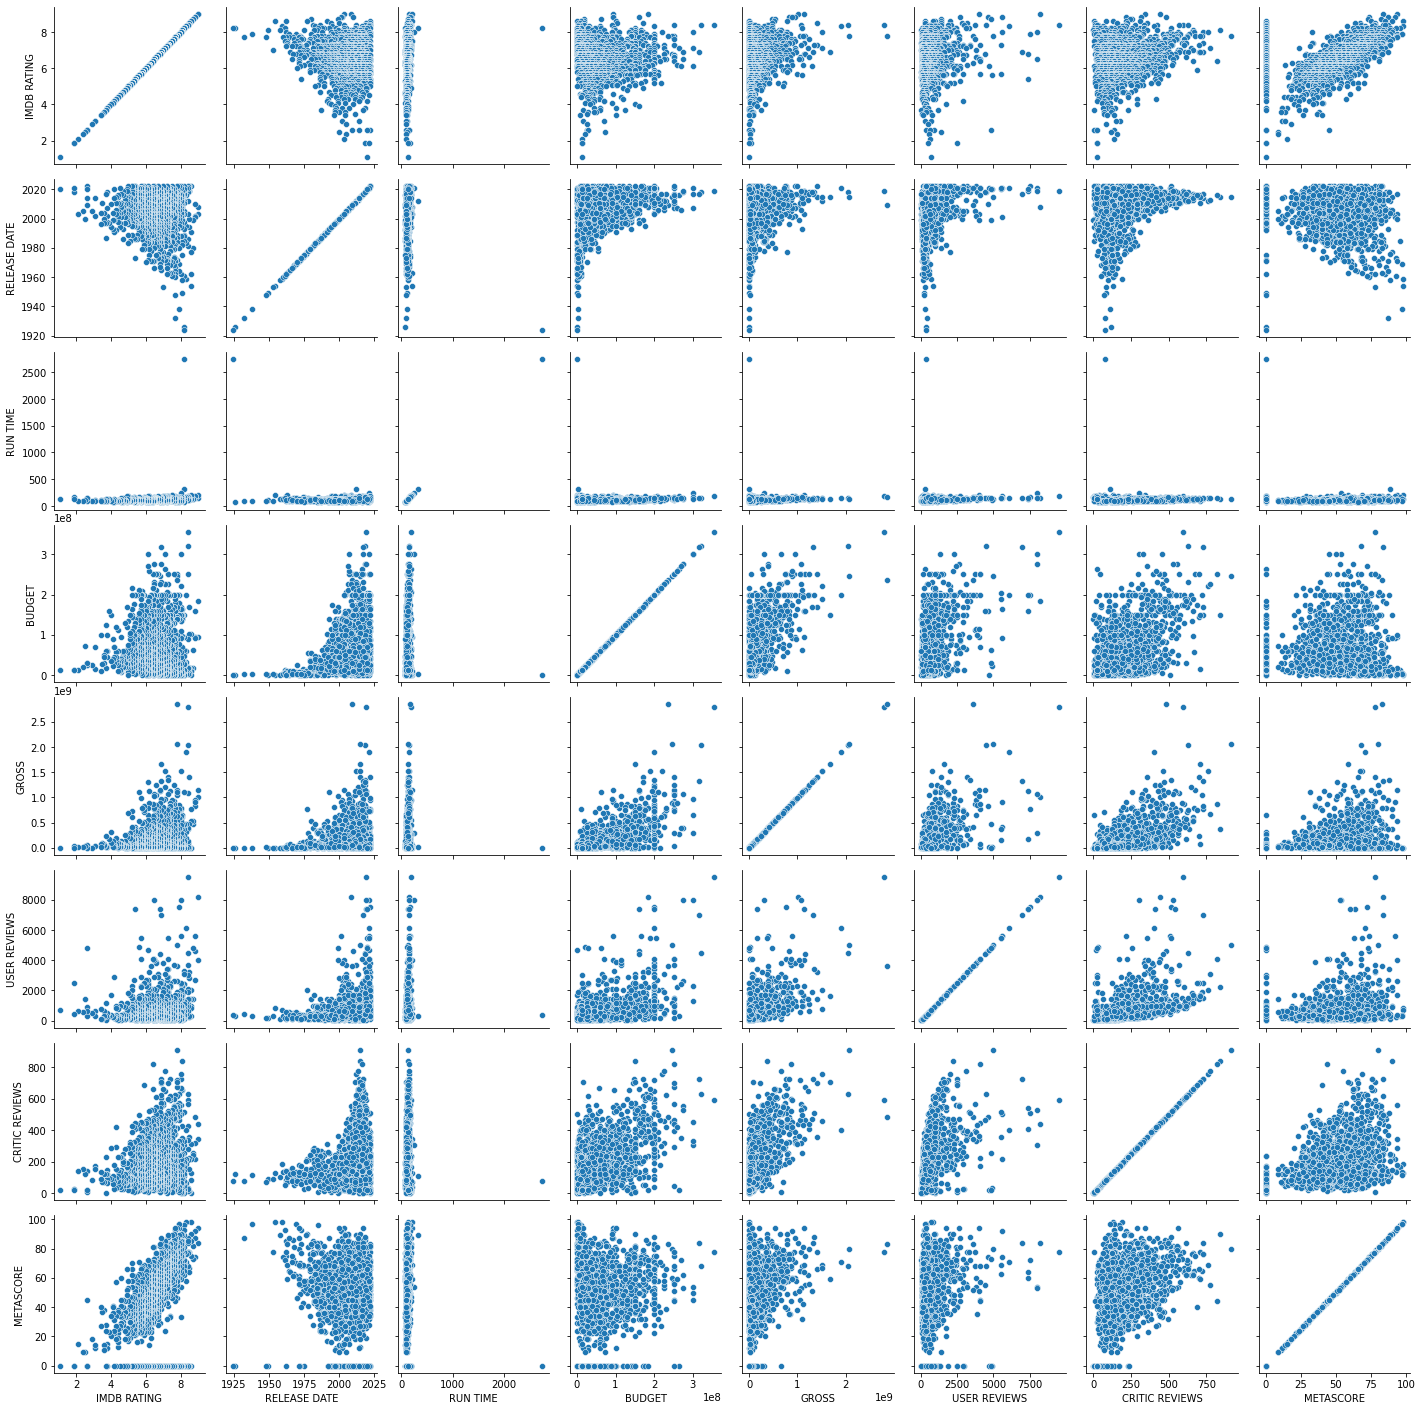

In [56]:
g = sns.PairGrid(df2)
g.map(sns.scatterplot)
plt.show()

In [57]:
df2.corr()

IMDB RATING  RELEASE DATE  RUN TIME    BUDGET     GROSS  \
IMDB RATING        1.000000     -0.144978  0.149188  0.044497  0.231083   
RELEASE DATE      -0.144978      1.000000 -0.111663  0.322761  0.179613   
RUN TIME           0.149188     -0.111663  1.000000  0.070757  0.081005   
BUDGET             0.044497      0.322761  0.070757  1.000000  0.682469   
GROSS              0.231083      0.179613  0.081005  0.682469  1.000000   
USER REVIEWS       0.187356      0.258399  0.104469  0.506368  0.585907   
CRITIC REVIEWS     0.236033      0.364195  0.025703  0.542076  0.602702   
METASCORE          0.443417     -0.132978 -0.034860  0.127447  0.276343   

                USER REVIEWS  CRITIC REVIEWS  METASCORE  
IMDB RATING         0.187356        0.236033   0.443417  
RELEASE DATE        0.258399        0.364195  -0.132978  
RUN TIME            0.104469        0.025703  -0.034860  
BUDGET              0.506368        0.542076   0.127447  
GROSS               0.585907        0.602702   0.276343  
USER REVIEWS        1.000000        0.493373   0.211125  
CRITIC REVIEWS      0.493373        1.000000   0.431632  
METASCORE           0.211125        0.431632   1.000000

In [58]:
df2.dtypes

IMDB RATING       float64
RELEASE DATE        int64
RUN TIME            int64
BUDGET            float64
GROSS             float64
USER REVIEWS      float64
CRITIC REVIEWS    float64
METASCORE         float64
dtype: object

In [59]:
df2["POLY_METASCORE"] = df2['METASCORE']**2
df2["GR_X_REV"] = df2['CRITIC REVIEWS']* df2['GROSS']

In [60]:
LR = LinearRegression()
x = df2.drop(columns=['IMDB RATING'])
y = df2['IMDB RATING']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
LR.fit(x_train,y_train)
prediction = LR.predict(x_test)
LR.score(x_test, y_test)
MSE = np.mean((prediction - y_test)**2)
MSE

0.6447691095589405